## 讀取圖片
常見的套件:
1. skimage
2. PIL
3. OpenCV

# [教學目標]
- 示範其他的讀圖檔方式

# [範例重點]
- 用 skimage.io 讀取圖檔 (In[2], Out[2])
- 用 PIL.Image 讀取圖檔 (In[3], Out[3])
- 用 OpenCV 讀取圖檔 (In[4], Out[4])

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [9]:
import skimage.io as skio
img1 = skio.imread('data/example.jpg')
print(img1)
print(type(img1)) 


# plt.imshow(img1)
# plt.show()

[[[204 194 184]
  [204 194 184]
  [204 194 184]
  ...
  [224 210 201]
  [224 210 201]
  [224 210 201]]

 [[204 194 184]
  [204 194 184]
  [204 194 184]
  ...
  [224 210 201]
  [224 210 201]
  [224 210 201]]

 [[204 194 184]
  [204 194 184]
  [204 194 184]
  ...
  [225 211 202]
  [225 211 202]
  [225 211 202]]

 ...

 [[146 140 140]
  [172 166 166]
  [160 154 154]
  ...
  [  3   2   0]
  [  3   2   0]
  [  3   2   0]]

 [[112 106 106]
  [157 151 151]
  [162 156 156]
  ...
  [  3   2   0]
  [  3   2   0]
  [  3   2   0]]

 [[ 95  86  87]
  [155 146 147]
  [180 171 172]
  ...
  [  3   2   0]
  [  3   2   0]
  [  3   2   0]]]
<class 'imageio.core.util.Array'>


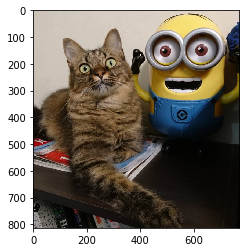

In [12]:
from PIL import Image
img2 = Image.open('data/example.jpg') # 這時候還是 PIL object
img2 = np.array(img2)
plt.imshow(img2)
plt.show()

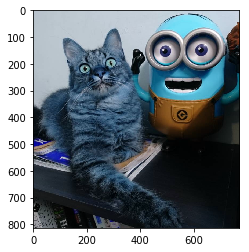

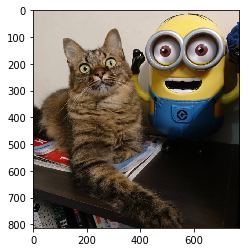

In [18]:
import cv2
img3 = cv2.imread('data/example.jpg')
plt.imshow(img3)
plt.show()

img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
plt.imshow(img3)
plt.show()

### 比較三種開圖方式的時間 - 比較讀取 1000 次

In [25]:
N_times = 1000

In [23]:
%%timeit
im = np.array([skio.imread('data/example.jpg') for _ in range(N_times)])

14.4 s ± 77.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [24]:
%%timeit
im = np.array([np.array(Image.open('data/example.jpg')) for _ in range(N_times)])

14.1 s ± 402 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [26]:
%%timeit
im = np.array([cv2.cvtColor(cv2.imread('data/example.jpg'), cv2.COLOR_BGR2RGB) for _ in range(N_times)])

12.2 s ± 319 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## 將影像存成 mat

In [9]:
import scipy.io as sio
sio.savemat(file_name='data/examples/example.mat', mdict={'img': img1})

In [10]:
mat_arr = sio.loadmat('data/examples/example.mat')
print(mat_arr.keys())

dict_keys(['__version__', 'img', '__globals__', '__header__'])


In [11]:
mat_arr = mat_arr['img']
print(mat_arr.shape)

(813, 771, 3)


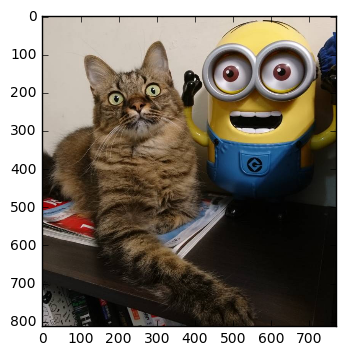

In [12]:
plt.imshow(mat_arr)
plt.show()

# 練習時間

## 1-1 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

## 1-2 將所提供的 txt 轉成 pandas dataframe

## 2. 從所提供的 txt 中的連結讀取圖片，請讀取上面 data frame 中的前 5 張圖片